# Exercise 6: Weather anomalies (10 points)

The aim of this exercise is to analyze historical weather data.
- In Problem 1 you read in a tricky data file and explore it's contents.
- In problem 2, you will convert and aggregate the data from daily temperatures in Fahrenheit, to monthly average temperatures in Celsius.
- In Problem 3, you will finally analyze weather anomalies by comparing monthly average temperatures to a long-term average.

### Tips for completing this exercise

- Use **exactly** the same variable names as in the instructions because your answers will be automatically graded, and the tests that grade your answers rely on following the same formatting or variable naming as in the instructions.
- **Please do not**:

    - **Change the file names**. Do all of your editing in the provided `Exercise-6-problems-1-3.ipynb` file (this file).
    - **Copy/paste cells in this notebook**. We use an automated grading system that will fail if there are copies of code cells.
    - **Change the existing cell types**. You can add cells, but changing the cell types for existing cells (from code to markdown, for example) will also cause the automated grader to fail.

## AI tool usage agreement

**Enter your name (and that of your partner) in the cell below** to confirm that you have followed the [course guidelines on the use of AI tools](https://geo-python-site.readthedocs.io/en/latest/course-info/ai-tools.html) and understand that misuse of AI tools is considered cheating.

My Name

## Problem 1 - Reading in a tricky data file (2 points)

You first task for this exercise is to read in the data file [data/1091402.txt](data/1091402.txt) to a variable called `data`. Pay attention to the input data structure and no data values.

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Reading the data into a variable called `data` using pandas
    - Skipping the second row of the datafile that contains `----------` characters that don't belong to the data
    - Convert the no-data values (`-9999`) into `NaN` 
- Calculating basic statistics from the data
- Including comments that explain what most lines in the code do

### Part 1 (1 point)

You should start by loading the data file.

- Read the data file into variable the variable `data`
    - Skip the second row
    - Convert the no-data values (`-9999`) into `NaN`

In [1]:
data = None

# YOUR CODE HERE
import pandas as pd
path = "data/1091402.txt"
data = pd.read_csv(path, skiprows=[1], delim_whitespace=True, na_values=-9999)

In [2]:
# Check that the dataframe looks ok:
data.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0


In [3]:
# Check the last rows of the data (there should be some NaN values)
data.tail()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN
23711,GHCND:FIE00142080,51,60.3269,24.9603,20170930,NaN,47.0,49.0,44.0
23712,GHCND:FIE00142080,51,60.3269,24.9603,20171001,0.04,47.0,48.0,45.0
23713,GHCND:FIE00142080,51,60.3269,24.9603,20171002,NaN,47.0,49.0,46.0
23714,GHCND:FIE00142080,51,60.3269,24.9603,20171003,0.94,47.0,NaN,44.0
23715,GHCND:FIE00142080,51,60.3269,24.9603,20171004,0.51,52.0,56.0,NaN


### Part 2 (1 point)

In this section, you will calculate some basic statistics of the input data.

- Calculate how many no-data (NaN) values there are in the `TAVG` column
    - Assign your answer to a variable called `tavg_nodata_count`

In [4]:
tavg_nodata_count = None

# YOUR CODE HERE
tavg_nodata_count = len(data[data.TAVG.isna()])

In [5]:
# Print out the solution:
print(f'Number of no-data values in column "TAVG": {tavg_nodata_count}')

Number of no-data values in column "TAVG": 3308


- Calculate how many no-data (NaN) values there are for the `TMIN` column
    - Assign your answer into a variable called `tmin_nodata_count`

In [6]:
tmin_nodata_count = None

# YOUR CODE HERE
tmin_nodata_count = len(data[data.TMIN.isna()])

In [7]:
# Print out the solution:
print(f'Number of no-data values in column "TMIN": {tmin_nodata_count}')

Number of no-data values in column "TMIN": 365


- Calculate the total number of days covered by this data file
    - Assign your answer into a variable called `day_count`

In [8]:
day_count = None

# YOUR CODE HERE
# No dates are repeated
data.DATE.unique().shape[0] == len(data.DATE) # True
day_count = len(data.DATE)

In [9]:
# Print out the solution:
print(f'Number of days: {day_count}')

Number of days: 23716


- Find the date of the oldest (first) observation
    - Assign your answer into a variable called `first_obs`

In [10]:
first_obs = None

# YOUR CODE HERE
first_obs = data.DATE.min()

In [11]:
# Print out the solution:
print(f'Date of the first observation: {first_obs}')

Date of the first observation: 19520101


- Find the date of the most recent (last) observation
    - Assign your answer into a variable called `last_obs`

In [12]:
last_obs = None

# YOUR CODE HERE
last_obs = data.DATE.max()

In [13]:
# Print out the solution:
print(f'Date of the last observation: {last_obs}')


Date of the last observation: 20171004


- Find the average temperature for the whole data file (all observtions) from column `TAVG`
    - Assign your answer into a variable called `avg_temp`

In [14]:
avg_temp = None

# YOUR CODE HERE
avg_temp = data.TAVG.mean()

In [15]:
# Print out the solution:
print(f'Average temperature (F) for the whole dataset: {round(avg_temp, 2)}')

Average temperature (F) for the whole dataset: 41.32


- Find the average `TMAX` temperature over the [Summer of '69](https://www.youtube.com/watch?v=9f06QZCVUHg) (months May, June, July, and August of the year 1969)
    - Assign your answer into a variable called `avg_temp_1969`

In [16]:
avg_temp_1969 = None

# YOUR CODE HERE
filter = ((data.DATE >= 19690501) & (data.DATE < 19690901))
filtered = data[filter]
avg_temp_1969 = filtered.TMAX.mean()

In [17]:
# This test print should print a number
print(f"Average temperature (F) for the Summer of '69: {round(avg_temp_1969, 2)}")


Average temperature (F) for the Summer of '69: 67.82


## Problem 2 - Calculating monthly average temperatures (3 points)

For this problem your goal is to calculate monthly average temperatures in degrees Celsius from the daily Fahrenheit values we have in the data file. You can continue working with the same DataFrame that you used in Problem 1.

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Calculating the monthly average temperatures in degrees Celsius for the each month in the dataset (i.e., for each month of each year)
    - You should store the monthly average temperatures in a new Pandas DataFrame called `monthly_data`
    - `monthly_data` should contain a new column called `temp_celsius` the monthly average temperatures in Celsius
    - Convert the `TAVG` values in Fahrenheit into Celsius and store the output in the `temp_celsius`
- Including comments that explain what most lines in the code do

**Hint**: *You can start by creating a new column with a label for each year and month, and then continue grouping the data based on this information.*

In [18]:
data.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0


In [19]:
monthly_data = None

# YOUR CODE HERE
# Creating unique months column in the "data" df
data["month"] = pd.to_datetime(data["DATE"], format="%Y%m%d").dt.to_period('M')
monthly_data = data.groupby("month")[["TAVG"]].mean()
monthly_data = monthly_data.reset_index()
monthly_data["temp_celsius"] = (monthly_data["TAVG"] - 32) * 5/9

In [20]:
# This test prints the length of variable monthly_data
print(len(monthly_data))

790


In [21]:
# This test prints the column names of monthly_data
print(monthly_data.columns.values)

['month' 'TAVG' 'temp_celsius']


In [22]:
# This test prints the mean of temp_celsius
print(monthly_data['temp_celsius'].mean())

5.097114347669992


In [23]:
# This test prints the median of temp_celsius
print(round(monthly_data['temp_celsius'].median(), 2))

4.73


In [24]:
monthly_data

,month,TAVG,temp_celsius
0,1952-01,29.478261,-1.400966
1,1952-02,24.800000,-4.000000
2,1952-03,13.807692,-10.106838
3,1952-04,39.607143,4.226190
4,1952-05,44.666667,7.037037
...,...,...,...
785,2017-06,56.300000,13.500000
786,2017-07,60.290323,15.716846
787,2017-08,60.290323,15.716846
788,2017-09,52.333333,11.296296


## Problem 3 - Calculating temperature anomalies (5 points)

Our goal in this problem is to calculate monthly temperature anomalies in order to see how temperatures have changed over time, relative to an observation period between 1952-1980. You can continue working with the same data that you used in Problems 1 and 2.

**Your score on this problem will be based on following criteria:**

### Part 1

- Calculating ***the average (mean) temperature for each month (e.g., January, February, March, ...) over the period from 1952 up to and including 1980*** in a new DataFrame called `reference_temps`
    - You should end up with 12 values, 1 mean temperature for each month during the time period (see example table and figure below).
    - The columns in the new DataFrame should be `month` and `ref_temp`
    
Your `reference_temps` dataframe should have the following structure: 1 value for each month of the year (12 total) and the values represent and average in the observation period 1952-1980. The `ref_temp` temperatures should be in degrees Celsius.
   
| month    | ref_temp         |
|----------|------------------|
| 01       | -5.838761        |
| 02       | -7.064088        |
| 03       | -3.874213        |
| ...      | ...              |

### Part 2

- Calculating **a temperature anomaly for every month** in the `monthly_data` DataFrame using the corresponding monthly average temperature for each of the 12 months:
    - In order to achieve this you need to make **a table join** (see [hints for this week](https://geo-python-site.readthedocs.io/en/develop/lessons/L6/exercise-6.html#joining-data-from-one-dataframe-to-another)) between `monthly_data` and `ref_temps` based on the month.
    - The temperature anomaly is calculated as the difference between the temperature for a given month (`temp_celsius` column in `monthly_data`) and the corresponding monthly reference temperature (`ref_temp` column in`reference_temps`).
    - Store the result in a new column `"diff"` 
    
As the output of the table join and the calculation, you should have three new columns in the `monthly_data` DataFrame:

1. `diff`: The temperature anomaly, i.e. the difference between the temperature for a given month (e.g., February 1960) and the mean temperature during the reference period (e.g., the average of all Februaries between 1952 and 1980), 
2. `month`: The month for that row of observations
3. `ref_temp`: The monthly reference temperature

A summary of the relationships between the `monthly_data` and `reference_temps` DataFrames, as well as how the `diff` value should be calculated in the `monthly_data` DataFrame is presented in the figure below.

![Exercise 6 dataframes](img/exercise-6-dataframes.png)<br/>
*Figure 1. Relationships between the `monthly_data` and `reference_temps` DataFrames.*

You should finally report which month had the greatest weather anomaly during the observed time period.

Remember to include comments in your code.

In [25]:
monthly_data = monthly_data.drop(columns=["TAVG"])
monthly_data = monthly_data.rename(columns={"month": "year_month"})

In [26]:
# YOUR CODE HERE
monthly_data["month"] = monthly_data.year_month.dt.month
new_filter = (monthly_data.year_month >= "1952-01") & (monthly_data.year_month < "1981-01")
new_filtered = monthly_data[new_filter]
reference_temps = new_filtered.groupby("month")[["temp_celsius"]].mean()
reference_temps = reference_temps.reset_index()
reference_temps = reference_temps.rename(columns={"temp_celsius": "ref_temp"})

In [27]:
# Joining both dataframes to get the ref temps for the 1952 to 1980 interval
monthly_data = monthly_data.merge(reference_temps, on ='month')

# Creating the temp differences column
monthly_data["diff"] = monthly_data["temp_celsius"] - monthly_data["ref_temp"] # diff is actually a bad name for a column...

absolute max 12.136149180361654
max 8.234722855723811
min -12.136149180361654


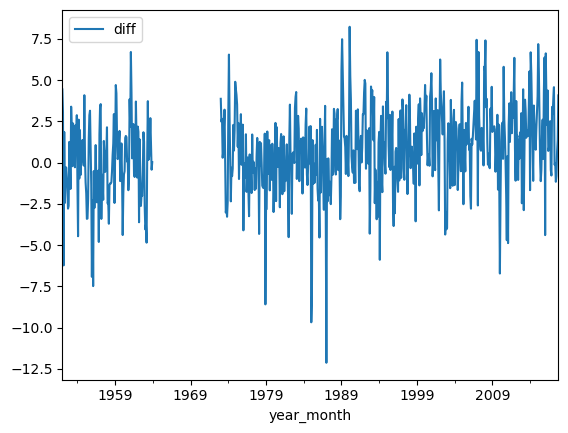

In [28]:
# Check the monthly data:
monthly_data.sort_values(by="year_month").plot(x="year_month", y="diff") # Wow, no data in a large gap interval...!
print("absolute max", monthly_data["diff"].abs().max())
print("max", monthly_data["diff"].max())
print("min", monthly_data["diff"].min())

In [29]:
# Print out desriptive statistics for the relevant columns:
monthly_data[["temp_celsius", "ref_temp", "diff"]].describe()

,temp_celsius,ref_temp,diff
count,682.000000,790.000000,682.000000
mean,5.097114,4.371859,0.722724
std,8.483949,8.284129,2.537855
min,-17.974910,-7.064088,-12.136149
25%,-1.685185,-3.874213,-0.820655
50%,4.726105,4.952240,0.789118
75%,12.870370,13.479851,2.325922
max,22.329749,16.520986,8.234723


Remember also to calculate which month had the largest temperature anomaly during the observed time period in comparison with the reference data. Use the cell below to calculate and print out the answers. Note, you may want to consider the largest absolute value of the temperature anomaly, as well as the largest positive and negative anomalies.

In [30]:
# YOUR CODE HERE
# Largest anomaly
print("Largest anomaly: ", monthly_data["diff"].abs().max())

# Month with largest anomaly
anomaly_year_month = monthly_data[monthly_data["diff"].abs() == 12.136149180361654]["year_month"].values[0]
year = anomaly_year_month.year
month = anomaly_year_month.month
print("Month with largest anomaly: ", str(year) + "-" + str(month))

Largest anomaly:  12.136149180361654
Month with largest anomaly:  1987-1


## Part 3 (*optional*) - **AI-LLM OK**

Using [ChatGPT](https://openai.com/chatgpt), calculate the reference temperatures and temperature anomalies as directed above.

- Your reference temperatures should be stored in a new DataFrame called `ai_reference_temps`
    - The columns in the new DataFrame should be `month` and `ai_ref_temp`
- Calculate **a temperature anomaly for every month** in the `monthly_data` DataFrame using the corresponding monthly average temperature for each of the 12 months:
    - You again need to make **a table join** (see [hints for this week](https://geo-python-site.readthedocs.io/en/develop/lessons/L6/exercise-6.html#joining-data-from-one-dataframe-to-another)) between `monthly_data` and `ai_ref_temps` based on the month.
    - The temperature anomaly is calculated as the difference between the temperature for a given month (`temp_celsius` column in `monthly_data`) and the corresponding monthly reference temperature (`ai_ref_temp` column in`reference_temps`).
    - Store the result in a new column `"ai_diff"` 

In order to do this, you should post both the prompt you provide to ChatGPT and the code it produces in the cells below. As your prompts may need to be refined to get your code working, please report each prompt so we can see how you arrived at your final version of the function.

### Prompt 1

Enter the text of the first prompt you used for this part of the exercise below.

Calculate monthly temperature anomalies in order to see how temperatures have changed over time, relative to an observation period between 1952-1980.

You will work with a df called monthly_data, with the following format:
monthly_data.info()
"""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   month         790 non-null    period[M]
 1   TAVG          682 non-null    float64  
 2   temp_celsius  682 non-null    float64  
dtypes: float64(2), period[M](1)
memory usage: 18.6 KB
"""

monthly_data.describe()
"""
 	TAVG 	temp_celsius
count 	682.000000 	682.000000
mean 	41.174806 	5.097114
std 	15.271108 	8.483949
min 	-0.354839 	-17.974910
25% 	28.966667 	-1.685185
50% 	40.506989 	4.726105
75% 	55.166667 	12.870370
max 	72.193548 	22.329749
"""

Part 1
Objective: Calculate the average (mean) temperature for each month (e.g., January, February, March, ...) over the period from 1952 up to and including 1980 in a new DataFrame called ai_reference_temps. End up with 12 values, 1 mean temperature for each month during the time period

1 - The columns in the new DataFrame should be month and ai_ref_temp
2 - The ai_reference_temps dataframe should have the following structure:
1 value for each month of the year (12 total) and the values represent and average calculated only for the an observation period between 1952-1980 (not the wole dataset). 

Part 2

Objective: Calculate a temperature anomaly for every month in the monthly_data DataFrame using the corresponding monthly average temperature for each of the 12 months. 

1 - make a table join between monthly_data and ref_temps based on the month.
2 - Calculate the temperature anomaly as the difference between the temperature for a given month (temp_celsius column in monthly_data) and the corresponding monthly reference temperature (ai_ref_temp column in ai_reference_temps).
3 - Store the result in a new column "ai_diff"
4 - As the output of the table join and the calculation, you should have three new columns in the monthly_data DataFrame:
- ai_diff: The temperature anomaly, i.e. the difference between the temperature for a given month (e.g., February 1960) and the mean temperature during the reference period (e.g., the average of all Februaries between 1952 and 1980),
- month: The month for that row of observations
- ai_ref_temp: The monthly reference temperature

Enter the code generated by your first prompt below.

In [31]:
import pandas as pd

# Filter the data to include only the period from 1952 to 1980
filtered_data = monthly_data[(monthly_data['month'].dt.year >= 1952) & (monthly_data['month'].dt.year <= 1980)]

# Group the data by month and calculate the mean temperature for each month
monthly_means = filtered_data.groupby('month').mean()

# Create a new DataFrame with the results
ai_reference_temps = pd.DataFrame({'month': monthly_means.index, 'ai_ref_temp': monthly_means['temp_celsius']})

# Merge the DataFrames on the 'month' column
merged_data = pd.merge(monthly_data, ai_reference_temps, on='month', suffixes=('', '_ref'))

# Calculate the temperature anomaly
merged_data['ai_diff'] = merged_data['temp_celsius'] - merged_data['ai_ref_temp']

AttributeError: Can only use .dt accessor with datetimelike values

Looking at the function produced by ChatGPT do you see any problems compared to your solution in Part 1? Please comment below about this.

**Yes, in line 4 there's an AttributeError**   
*AttributeError: Can only use .dt accessor with datetimelike values*

The monthly data needs to accessed as something like --> monthly_data.year_month >= "1952-01"

Test out your code by running the tests below.

In [ ]:
# Check the monthly data:
# monthly_data.head()

In [ ]:
# Print out desriptive statistics for the relevant columns:
# monthly_data[["temp_celsius", "ai_ref_temp", "ai_diff"]].describe()

### Additional prompts

In the event your code does not pass all of the tests above, please enter the prompt(s) you used to refine the function in the cell below. If you used more than one prompt, you can format them as a Markdown list using the format demonstrated below:

```
1. First prompt
2. Second prompt
3. ...
```

If no additional prompts were needed, you can skip this.

Not gonna do it... Too much of an hassle to fix it!

Enter the final version of your code produced by ChatGPT in the cell below. You can test the code by re-running the tests above after updating the code below.

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

Does your revised function now pass all of the tests?
- If yes, please comment below about your experience using ChatGPT and the benefits and drawbacks you see.
- If no, what kinds of problems do you see with the revised function produced by ChatGPT compared to your solution in Part 1? Please comment below about this.

YOUR ANSWER HERE

### Final comments

If you have any other comments about your experience using ChatGPT in this problem, please enter those below.

YOUR ANSWER HERE

### On to Problem 4 (*optional*)

Now you can continue to the *optional* [Problem 4](Exercise-6-problem-4.ipynb)